In [1]:
from pyparsing import Word, hexnums, WordEnd, Optional, alphas, alphanums
import numpy as np
import pandas as pd
import os
import tensorflow as tf
from tensorflow.keras.layers import Embedding, LSTM, Dense
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.text import one_hot
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
path="Data/Experiment 2/Train2"
f = os.listdir(path)

try:
    for index, file in enumerate(f):
        os.rename(os.path.join(path, file), os.path.join(path, ''.join([str(index), '.asm'])))
except:
    pass

In [3]:
files =[]
for i in range(101):
    with open(path+'/'+str(i)+'.asm') as source:
        line = Optional(Word(alphas.lower(),alphanums)("opcode"))
        file=[]
        for source_line in source:
            result = line.parseString(source_line)
            if "opcode" in result:
                if result.opcode!='nop':
                    file.append(result.opcode)
        print(file)
        files.append(file)

['mov', 'mov', 'mov', 'mov', 'int', 'mov', 'mov', 'int', 'db', 'push', 'mov', 'mov', 'mov', 'mov', 'call', 'jz', 'call', 'call', 'call', 'jz', 'call', 'call', 'call', 'call', 'pop', 'mov', 'cli', 'mov', 'mov', 'mov', 'mov', 'cmp', 'sti', 'jmp', 'mov', 'mov', 'mov', 'xor', 'mov', 'int', 'cmp', 'jz', 'xor', 'mov', 'mov', 'call', 'jnz', 'xor', 'mov', 'inc', 'mov', 'call', 'ret', 'call', 'jc', 'cmp', 'jnz', 'dec', 'mov', 'mov', 'call', 'inc', 'push', 'call', 'jz', 'pop', 'xor', 'stosb', 'mov', 'mov', 'mov', 'mov', 'mul', 'add', 'mov', 'call', 'push', 'call', 'jnz', 'call', 'jnz', 'inc', 'pop', 'xor', 'stosb', 'or', 'ret', 'ret', 'call', 'mov', 'mov', 'int', 'mov', 'mov', 'call', 'push', 'mov', 'cmp', 'mov', 'mov', 'int', 'or', 'jz', 'pop', 'inc', 'stosb', 'mov', 'mov', 'call', 'dec', 'push', 'call', 'jc', 'mov', 'int', 'jmp', 'pop', 'mov', 'stc', 'ret', 'pop', 'ret', 'call', 'push', 'mov', 'int', 'mov', 'mov', 'mov', 'int', 'pop', 'or', 'jz', 'test', 'jnz', 'cmp', 'je', 'call', 'push', 'mo

['mov', 'mov', 'mov', 'mov', 'int', 'mov', 'mov', 'int', 'db', 'push', 'mov', 'mov', 'mov', 'mov', 'call', 'jz', 'call', 'call', 'call', 'jz', 'call', 'call', 'call', 'call', 'pop', 'mov', 'cli', 'mov', 'mov', 'mov', 'mov', 'cmp', 'sti', 'jmp', 'mov', 'mov', 'xor', 'xor', 'xor', 'xor', 'xor', 'xor', 'xor', 'xor', 'xor', 'xor', 'xor', 'xor', 'xor', 'xor', 'xor', 'mov', 'xor', 'mov', 'int', 'cmp', 'jz', 'xor', 'mov', 'mov', 'call', 'jnz', 'xor', 'mov', 'inc', 'mov', 'call', 'ret', 'call', 'jc', 'cmp', 'jnz', 'dec', 'mov', 'mov', 'call', 'inc', 'push', 'call', 'jz', 'pop', 'xor', 'stosb', 'mov', 'mov', 'mov', 'mov', 'mul', 'add', 'mov', 'call', 'push', 'call', 'jnz', 'call', 'jnz', 'inc', 'pop', 'xor', 'stosb', 'or', 'ret', 'call', 'ret', 'call', 'mov', 'mov', 'int', 'mov', 'mov', 'call', 'push', 'mov', 'cmp', 'mov', 'mov', 'int', 'or', 'jz', 'pop', 'inc', 'stosb', 'mov', 'mov', 'call', 'dec', 'push', 'call', 'jc', 'mov', 'cmp', 'int', 'jmp', 'pop', 'mov', 'stc', 'call', 'ret', 'pop', 're

['mov', 'mov', 'mov', 'mov', 'int', 'cmp', 'cmp', 'cmp', 'cmp', 'cmp', 'cmp', 'cmp', 'cmp', 'cmp', 'cmp', 'cmp', 'cmp', 'cmp', 'cmp', 'cmp', 'cmp', 'mov', 'mov', 'int', 'db', 'push', 'mov', 'mov', 'mov', 'mov', 'call', 'jz', 'call', 'call', 'call', 'jz', 'call', 'call', 'call', 'pop', 'mov', 'cli', 'mov', 'mov', 'mov', 'mov', 'sti', 'jmp', 'mov', 'mov', 'mov', 'xor', 'mov', 'int', 'cmp', 'jz', 'xor', 'mov', 'cmp', 'call', 'mov', 'call', 'jnz', 'xor', 'mov', 'cmp', 'inc', 'mov', 'call', 'call', 'ret', 'call', 'jc', 'cmp', 'jnz', 'dec', 'mov', 'mov', 'call', 'inc', 'push', 'call', 'jz', 'call', 'pop', 'xor', 'stosb', 'mov', 'mov', 'mov', 'mov', 'mul', 'add', 'mov', 'call', 'push', 'call', 'jnz', 'call', 'jnz', 'call', 'inc', 'pop', 'xor', 'stosb', 'or', 'call', 'ret', 'ret', 'xor', 'mov', 'mov', 'int', 'mov', 'mov', 'call', 'push', 'mov', 'mov', 'mov', 'call', 'int', 'or', 'jz', 'pop', 'inc', 'stosb', 'mov', 'mov', 'cmp', 'call', 'dec', 'push', 'call', 'jc', 'mov', 'int', 'call', 'jmp', 

['mov', 'mov', 'mov', 'mov', 'int', 'mov', 'cmp', 'cmp', 'cmp', 'cmp', 'cmp', 'cmp', 'cmp', 'cmp', 'cmp', 'cmp', 'cmp', 'mov', 'int', 'db', 'call', 'push', 'mov', 'mov', 'mov', 'mov', 'call', 'jz', 'call', 'call', 'call', 'jz', 'call', 'call', 'call', 'call', 'pop', 'mov', 'cli', 'mov', 'mov', 'mov', 'mov', 'sti', 'jmp', 'mov', 'mov', 'mov', 'xor', 'mov', 'int', 'cmp', 'jz', 'xor', 'mov', 'mov', 'call', 'jnz', 'xor', 'mov', 'inc', 'mov', 'call', 'call', 'ret', 'call', 'jc', 'cmp', 'jnz', 'dec', 'mov', 'mov', 'call', 'inc', 'push', 'call', 'jz', 'pop', 'xor', 'stosb', 'mov', 'mov', 'mov', 'mov', 'mul', 'add', 'mov', 'call', 'push', 'call', 'jnz', 'call', 'jnz', 'inc', 'pop', 'xor', 'call', 'stosb', 'or', 'call', 'call', 'ret', 'call', 'ret', 'mov', 'mov', 'int', 'mov', 'mov', 'call', 'push', 'mov', 'cmp', 'mov', 'mov', 'cmp', 'call', 'int', 'or', 'jz', 'pop', 'inc', 'stosb', 'mov', 'mov', 'cmp', 'call', 'dec', 'push', 'call', 'jc', 'mov', 'int', 'jmp', 'pop', 'mov', 'stc', 'call', 'ret'

['mov', 'mov', 'mov', 'mov', 'int', 'mov', 'cmp', 'cmp', 'cmp', 'cmp', 'cmp', 'cmp', 'cmp', 'cmp', 'cmp', 'cmp', 'cmp', 'mov', 'int', 'db', 'call', 'push', 'mov', 'mov', 'mov', 'mov', 'call', 'jz', 'call', 'call', 'call', 'jz', 'call', 'call', 'call', 'call', 'call', 'pop', 'mov', 'cli', 'mov', 'mov', 'mov', 'mov', 'sti', 'jmp', 'mov', 'mov', 'mov', 'xor', 'mov', 'int', 'cmp', 'jz', 'xor', 'mov', 'mov', 'call', 'jnz', 'xor', 'mov', 'inc', 'mov', 'call', 'call', 'ret', 'call', 'jc', 'cmp', 'jnz', 'dec', 'mov', 'mov', 'call', 'inc', 'push', 'call', 'jz', 'pop', 'xor', 'stosb', 'mov', 'mov', 'mov', 'mov', 'mul', 'add', 'mov', 'call', 'push', 'call', 'jnz', 'call', 'jnz', 'call', 'inc', 'pop', 'xor', 'stosb', 'or', 'call', 'call', 'ret', 'call', 'ret', 'mov', 'mov', 'int', 'mov', 'mov', 'call', 'push', 'mov', 'cmp', 'mov', 'mov', 'cmp', 'call', 'int', 'or', 'jz', 'pop', 'inc', 'stosb', 'mov', 'mov', 'call', 'dec', 'push', 'call', 'jc', 'mov', 'int', 'jmp', 'pop', 'mov', 'stc', 'ret', 'pop'

['mov', 'mov', 'mov', 'mov', 'int', 'mov', 'cmp', 'cmp', 'cmp', 'cmp', 'cmp', 'cmp', 'cmp', 'cmp', 'cmp', 'cmp', 'cmp', 'mov', 'int', 'db', 'call', 'push', 'mov', 'mov', 'mov', 'mov', 'call', 'jz', 'call', 'call', 'call', 'jz', 'call', 'call', 'call', 'call', 'call', 'pop', 'mov', 'cli', 'mov', 'mov', 'mov', 'mov', 'sti', 'call', 'jmp', 'mov', 'mov', 'mov', 'xor', 'mov', 'int', 'cmp', 'jz', 'xor', 'mov', 'mov', 'call', 'jnz', 'xor', 'mov', 'inc', 'cmp', 'cmp', 'cmp', 'cmp', 'mov', 'call', 'call', 'ret', 'call', 'jc', 'cmp', 'jnz', 'dec', 'mov', 'mov', 'call', 'inc', 'push', 'call', 'jz', 'pop', 'xor', 'stosb', 'mov', 'mov', 'mov', 'mov', 'mul', 'add', 'mov', 'call', 'push', 'call', 'jnz', 'call', 'jnz', 'call', 'inc', 'pop', 'xor', 'stosb', 'or', 'call', 'call', 'ret', 'call', 'ret', 'mov', 'mov', 'int', 'mov', 'mov', 'call', 'push', 'mov', 'cmp', 'mov', 'mov', 'call', 'int', 'or', 'jz', 'pop', 'inc', 'stosb', 'mov', 'mov', 'call', 'dec', 'push', 'call', 'jc', 'mov', 'int', 'jmp', 'pop

['mov', 'mov', 'mov', 'mov', 'int', 'mov', 'cmp', 'cmp', 'cmp', 'cmp', 'cmp', 'cmp', 'cmp', 'cmp', 'cmp', 'cmp', 'cmp', 'mov', 'int', 'db', 'call', 'push', 'mov', 'mov', 'mov', 'mov', 'call', 'jz', 'call', 'call', 'call', 'jz', 'call', 'call', 'call', 'call', 'call', 'pop', 'mov', 'cli', 'mov', 'mov', 'mov', 'mov', 'sti', 'jmp', 'mov', 'mov', 'mov', 'xor', 'mov', 'int', 'cmp', 'jz', 'xor', 'mov', 'mov', 'call', 'jnz', 'xor', 'mov', 'inc', 'cmp', 'cmp', 'cmp', 'cmp', 'mov', 'call', 'call', 'ret', 'call', 'jc', 'cmp', 'jnz', 'dec', 'mov', 'mov', 'cmp', 'call', 'inc', 'push', 'call', 'jz', 'call', 'pop', 'xor', 'stosb', 'mov', 'mov', 'mov', 'mov', 'mul', 'add', 'mov', 'call', 'push', 'call', 'jnz', 'call', 'jnz', 'call', 'inc', 'pop', 'xor', 'stosb', 'or', 'call', 'call', 'ret', 'call', 'ret', 'mov', 'mov', 'int', 'mov', 'mov', 'call', 'push', 'mov', 'cmp', 'mov', 'mov', 'call', 'int', 'or', 'jz', 'pop', 'inc', 'stosb', 'mov', 'mov', 'call', 'dec', 'push', 'call', 'jc', 'mov', 'int', 'jmp

['mov', 'mov', 'mov', 'mov', 'int', 'mov', 'cmp', 'cmp', 'cmp', 'cmp', 'cmp', 'cmp', 'cmp', 'cmp', 'cmp', 'cmp', 'cmp', 'mov', 'int', 'db', 'call', 'push', 'mov', 'mov', 'mov', 'mov', 'call', 'jz', 'call', 'call', 'call', 'jz', 'call', 'call', 'call', 'call', 'call', 'pop', 'mov', 'cli', 'mov', 'mov', 'mov', 'mov', 'sti', 'jmp', 'mov', 'mov', 'mov', 'xor', 'mov', 'int', 'cmp', 'jz', 'xor', 'mov', 'mov', 'call', 'jnz', 'xor', 'mov', 'inc', 'cmp', 'cmp', 'cmp', 'cmp', 'mov', 'call', 'call', 'ret', 'call', 'jc', 'cmp', 'jnz', 'dec', 'mov', 'mov', 'cmp', 'call', 'inc', 'push', 'call', 'jz', 'call', 'pop', 'xor', 'stosb', 'mov', 'mov', 'mov', 'mov', 'mul', 'add', 'mov', 'call', 'push', 'call', 'jnz', 'call', 'jnz', 'call', 'inc', 'pop', 'xor', 'stosb', 'or', 'call', 'call', 'ret', 'call', 'ret', 'mov', 'mov', 'int', 'mov', 'mov', 'call', 'push', 'mov', 'cmp', 'mov', 'mov', 'call', 'call', 'call', 'int', 'or', 'jz', 'pop', 'inc', 'stosb', 'mov', 'mov', 'call', 'dec', 'push', 'call', 'jc', 'm

['mov', 'mov', 'mov', 'mov', 'int', 'mov', 'cmp', 'cmp', 'cmp', 'cmp', 'cmp', 'cmp', 'cmp', 'cmp', 'cmp', 'cmp', 'cmp', 'mov', 'int', 'db', 'call', 'push', 'mov', 'mov', 'mov', 'mov', 'call', 'jz', 'call', 'call', 'call', 'jz', 'call', 'call', 'call', 'call', 'call', 'pop', 'mov', 'cli', 'mov', 'mov', 'mov', 'mov', 'sti', 'jmp', 'mov', 'mov', 'mov', 'xor', 'mov', 'int', 'cmp', 'jz', 'xor', 'call', 'mov', 'mov', 'call', 'jnz', 'xor', 'mov', 'cmp', 'inc', 'cmp', 'cmp', 'cmp', 'cmp', 'mov', 'call', 'call', 'ret', 'call', 'jc', 'cmp', 'jnz', 'dec', 'mov', 'mov', 'call', 'inc', 'push', 'call', 'jz', 'call', 'pop', 'xor', 'stosb', 'mov', 'mov', 'mov', 'mov', 'mul', 'add', 'mov', 'call', 'push', 'call', 'jnz', 'call', 'jnz', 'call', 'inc', 'pop', 'xor', 'stosb', 'or', 'call', 'call', 'ret', 'call', 'ret', 'mov', 'mov', 'int', 'mov', 'mov', 'call', 'push', 'mov', 'cmp', 'mov', 'mov', 'call', 'int', 'or', 'jz', 'pop', 'inc', 'stosb', 'mov', 'mov', 'call', 'dec', 'push', 'call', 'jc', 'mov', 'in

['mov', 'mov', 'mov', 'mov', 'int', 'mov', 'mov', 'int', 'db', 'push', 'mov', 'mov', 'mov', 'mov', 'call', 'jz', 'call', 'call', 'call', 'jz', 'call', 'call', 'call', 'call', 'pop', 'mov', 'cli', 'mov', 'mov', 'mov', 'mov', 'cmp', 'sti', 'jmp', 'mov', 'mov', 'mov', 'xor', 'mov', 'int', 'cmp', 'jz', 'xor', 'mov', 'mov', 'call', 'jnz', 'xor', 'mov', 'inc', 'mov', 'call', 'ret', 'call', 'jc', 'cmp', 'jnz', 'dec', 'mov', 'mov', 'call', 'inc', 'push', 'call', 'jz', 'pop', 'xor', 'stosb', 'mov', 'mov', 'mov', 'mov', 'mul', 'add', 'mov', 'call', 'push', 'call', 'jnz', 'call', 'jnz', 'inc', 'pop', 'xor', 'stosb', 'or', 'ret', 'ret', 'call', 'mov', 'mov', 'int', 'mov', 'mov', 'call', 'push', 'mov', 'cmp', 'mov', 'mov', 'int', 'or', 'jz', 'pop', 'inc', 'stosb', 'mov', 'mov', 'call', 'dec', 'push', 'call', 'jc', 'mov', 'int', 'jmp', 'pop', 'mov', 'stc', 'ret', 'pop', 'call', 'ret', 'call', 'push', 'mov', 'int', 'mov', 'mov', 'cmp', 'mov', 'int', 'pop', 'or', 'jz', 'test', 'jnz', 'cmp', 'je', 'cal

['mov', 'mov', 'mov', 'mov', 'int', 'cmp', 'cmp', 'cmp', 'cmp', 'cmp', 'cmp', 'cmp', 'cmp', 'cmp', 'cmp', 'cmp', 'cmp', 'cmp', 'cmp', 'cmp', 'cmp', 'mov', 'mov', 'int', 'db', 'push', 'mov', 'mov', 'mov', 'cmp', 'mov', 'call', 'jz', 'call', 'call', 'call', 'jz', 'call', 'call', 'call', 'call', 'pop', 'mov', 'cli', 'call', 'mov', 'mov', 'mov', 'mov', 'call', 'sti', 'jmp', 'mov', 'xor', 'xor', 'xor', 'xor', 'xor', 'mov', 'xor', 'xor', 'xor', 'xor', 'xor', 'xor', 'xor', 'xor', 'xor', 'xor', 'mov', 'xor', 'mov', 'int', 'cmp', 'jz', 'xor', 'mov', 'call', 'mov', 'call', 'jnz', 'xor', 'mov', 'cmp', 'inc', 'mov', 'call', 'call', 'ret', 'call', 'jc', 'cmp', 'jnz', 'dec', 'mov', 'mov', 'call', 'inc', 'push', 'call', 'jz', 'call', 'call', 'pop', 'xor', 'stosb', 'mov', 'mov', 'cmp', 'mov', 'mov', 'mul', 'add', 'mov', 'cmp', 'call', 'push', 'call', 'jnz', 'call', 'jnz', 'call', 'call', 'call', 'inc', 'pop', 'xor', 'stosb', 'or', 'call', 'ret', 'ret', 'xor', 'mov', 'mov', 'int', 'mov', 'mov', 'call',

In [4]:
path="Data/Experiment 2/Test"
f = os.listdir(path)

try:
    for index, file in enumerate(f):
        os.rename(os.path.join(path, file), os.path.join(path, ''.join([str(index), '.asm'])))
except:
    pass

In [5]:
tfiles =[]
for i in range(20):
    with open(path+'/'+str(i)+'.asm') as source:
        line = Optional(Word(alphas.lower(),alphanums)("opcode"))
        file=[]
        for source_line in source:
            result = line.parseString(source_line)
            if "opcode" in result:
                if result.opcode!='nop':
                    file.append(result.opcode)
        print(file)
        tfiles.append(file)

['mov', 'cmp', 'cmp', 'cmp', 'cmp', 'mov', 'mov', 'mov', 'int', 'mov', 'cmp', 'cmp', 'cmp', 'cmp', 'cmp', 'cmp', 'cmp', 'cmp', 'cmp', 'cmp', 'cmp', 'mov', 'int', 'db', 'call', 'call', 'call', 'call', 'call', 'push', 'mov', 'mov', 'mov', 'cmp', 'mov', 'call', 'jz', 'call', 'call', 'call', 'jz', 'call', 'call', 'call', 'call', 'call', 'call', 'call', 'call', 'call', 'call', 'pop', 'xor', 'xor', 'xor', 'xor', 'mov', 'cli', 'cmp', 'mov', 'call', 'call', 'call', 'call', 'mov', 'cmp', 'mov', 'cmp', 'cmp', 'cmp', 'cmp', 'cmp', 'cmp', 'cmp', 'cmp', 'cmp', 'cmp', 'cmp', 'mov', 'cmp', 'cmp', 'cmp', 'call', 'sti', 'call', 'call', 'jmp', 'call', 'call', 'call', 'mov', 'cmp', 'cmp', 'cmp', 'cmp', 'cmp', 'cmp', 'cmp', 'cmp', 'cmp', 'mov', 'xor', 'xor', 'xor', 'xor', 'xor', 'xor', 'cmp', 'cmp', 'cmp', 'cmp', 'cmp', 'cmp', 'cmp', 'cmp', 'cmp', 'cmp', 'cmp', 'cmp', 'cmp', 'cmp', 'mov', 'xor', 'mov', 'int', 'cmp', 'jz', 'xor', 'call', 'mov', 'cmp', 'call', 'call', 'call', 'cmp', 'cmp', 'cmp', 'cmp', 'cm

['mov', 'cmp', 'cmp', 'cmp', 'cmp', 'mov', 'mov', 'mov', 'int', 'mov', 'cmp', 'cmp', 'cmp', 'cmp', 'cmp', 'cmp', 'cmp', 'cmp', 'cmp', 'cmp', 'cmp', 'mov', 'int', 'db', 'call', 'call', 'call', 'call', 'call', 'push', 'mov', 'mov', 'mov', 'cmp', 'mov', 'call', 'jz', 'call', 'call', 'call', 'jz', 'call', 'call', 'call', 'call', 'call', 'call', 'call', 'call', 'call', 'call', 'pop', 'xor', 'xor', 'xor', 'xor', 'mov', 'cli', 'cmp', 'mov', 'call', 'call', 'call', 'call', 'mov', 'cmp', 'mov', 'cmp', 'cmp', 'cmp', 'cmp', 'cmp', 'cmp', 'cmp', 'cmp', 'cmp', 'cmp', 'cmp', 'mov', 'cmp', 'cmp', 'cmp', 'call', 'sti', 'call', 'call', 'jmp', 'call', 'call', 'call', 'mov', 'cmp', 'cmp', 'cmp', 'cmp', 'cmp', 'cmp', 'cmp', 'cmp', 'cmp', 'mov', 'xor', 'xor', 'xor', 'xor', 'xor', 'xor', 'cmp', 'cmp', 'cmp', 'cmp', 'cmp', 'cmp', 'cmp', 'cmp', 'cmp', 'cmp', 'cmp', 'cmp', 'cmp', 'cmp', 'mov', 'xor', 'mov', 'int', 'cmp', 'jz', 'xor', 'call', 'mov', 'cmp', 'call', 'call', 'call', 'cmp', 'cmp', 'cmp', 'cmp', 'cm

['mov', 'cmp', 'cmp', 'cmp', 'cmp', 'mov', 'mov', 'mov', 'int', 'mov', 'cmp', 'cmp', 'cmp', 'cmp', 'cmp', 'cmp', 'cmp', 'cmp', 'cmp', 'cmp', 'cmp', 'mov', 'int', 'db', 'call', 'call', 'call', 'call', 'call', 'push', 'mov', 'mov', 'mov', 'cmp', 'mov', 'call', 'jz', 'call', 'call', 'call', 'jz', 'call', 'call', 'call', 'call', 'call', 'call', 'call', 'call', 'call', 'call', 'pop', 'xor', 'xor', 'xor', 'xor', 'mov', 'cli', 'cmp', 'mov', 'call', 'call', 'call', 'call', 'mov', 'cmp', 'mov', 'cmp', 'cmp', 'cmp', 'cmp', 'cmp', 'cmp', 'cmp', 'cmp', 'cmp', 'cmp', 'cmp', 'mov', 'cmp', 'cmp', 'cmp', 'call', 'sti', 'call', 'call', 'jmp', 'call', 'call', 'call', 'mov', 'cmp', 'cmp', 'cmp', 'cmp', 'cmp', 'cmp', 'cmp', 'cmp', 'cmp', 'mov', 'xor', 'xor', 'xor', 'xor', 'xor', 'xor', 'cmp', 'cmp', 'cmp', 'cmp', 'cmp', 'cmp', 'cmp', 'cmp', 'cmp', 'cmp', 'cmp', 'cmp', 'cmp', 'cmp', 'mov', 'xor', 'mov', 'int', 'cmp', 'jz', 'xor', 'call', 'mov', 'cmp', 'call', 'call', 'call', 'cmp', 'cmp', 'cmp', 'cmp', 'cm

['mov', 'cmp', 'cmp', 'cmp', 'cmp', 'mov', 'mov', 'mov', 'int', 'mov', 'cmp', 'cmp', 'cmp', 'cmp', 'cmp', 'cmp', 'cmp', 'cmp', 'cmp', 'cmp', 'cmp', 'mov', 'int', 'db', 'call', 'call', 'call', 'call', 'call', 'push', 'mov', 'cmp', 'cmp', 'cmp', 'cmp', 'cmp', 'cmp', 'cmp', 'cmp', 'cmp', 'mov', 'mov', 'cmp', 'mov', 'call', 'jz', 'call', 'call', 'call', 'jz', 'call', 'call', 'call', 'call', 'call', 'call', 'call', 'call', 'call', 'call', 'pop', 'xor', 'xor', 'xor', 'xor', 'mov', 'cli', 'cmp', 'mov', 'call', 'call', 'call', 'call', 'mov', 'mov', 'cmp', 'cmp', 'cmp', 'cmp', 'cmp', 'cmp', 'cmp', 'cmp', 'cmp', 'cmp', 'cmp', 'mov', 'cmp', 'cmp', 'call', 'sti', 'call', 'call', 'jmp', 'call', 'call', 'call', 'mov', 'cmp', 'cmp', 'cmp', 'cmp', 'cmp', 'cmp', 'cmp', 'cmp', 'cmp', 'mov', 'xor', 'xor', 'xor', 'xor', 'xor', 'xor', 'mov', 'xor', 'mov', 'int', 'cmp', 'jz', 'xor', 'call', 'mov', 'cmp', 'call', 'call', 'call', 'cmp', 'cmp', 'cmp', 'cmp', 'cmp', 'cmp', 'cmp', 'cmp', 'cmp', 'cmp', 'cmp', 'cm

['mov', 'cmp', 'cmp', 'cmp', 'cmp', 'mov', 'mov', 'mov', 'int', 'mov', 'cmp', 'cmp', 'cmp', 'cmp', 'cmp', 'cmp', 'cmp', 'cmp', 'cmp', 'cmp', 'cmp', 'mov', 'int', 'db', 'call', 'call', 'push', 'mov', 'cmp', 'mov', 'xor', 'xor', 'xor', 'xor', 'xor', 'xor', 'xor', 'xor', 'xor', 'xor', 'xor', 'xor', 'mov', 'mov', 'call', 'jz', 'call', 'call', 'call', 'jz', 'call', 'call', 'call', 'call', 'call', 'call', 'call', 'pop', 'cmp', 'cmp', 'cmp', 'cmp', 'cmp', 'cmp', 'cmp', 'cmp', 'cmp', 'cmp', 'cmp', 'cmp', 'cmp', 'cmp', 'cmp', 'cmp', 'cmp', 'cmp', 'mov', 'cli', 'mov', 'call', 'call', 'call', 'call', 'mov', 'mov', 'cmp', 'cmp', 'cmp', 'cmp', 'cmp', 'cmp', 'mov', 'call', 'call', 'call', 'sti', 'jmp', 'call', 'call', 'call', 'call', 'call', 'mov', 'mov', 'mov', 'xor', 'mov', 'cmp', 'int', 'cmp', 'jz', 'xor', 'call', 'mov', 'call', 'call', 'call', 'cmp', 'cmp', 'cmp', 'cmp', 'mov', 'call', 'jnz', 'xor', 'mov', 'inc', 'cmp', 'cmp', 'cmp', 'cmp', 'mov', 'call', 'call', 'call', 'call', 'call', 'ret', '

In [6]:
path="Data/Experiment 1/Train 2"
f = os.listdir(path)

try:
    for index, file in enumerate(f):
        os.rename(os.path.join(path, file), os.path.join(path, ''.join([str(index), '.asm'])))
except:
    pass

In [7]:
timidfiles =[]
for i in range(101):
    with open(path+'/'+str(i)+'.asm') as source:
        line = Optional(Word(alphas.lower(),alphanums)("opcode"))
        file=[]
        for source_line in source:
            result = line.parseString(source_line)
            if "opcode" in result:
                if result.opcode!='nop':
                    file.append(result.opcode)
        print(file)
        timidfiles.append(file)

['jmp', 'db', 'mov', 'mov', 'int', 'call', 'sub', 'mov', 'mov', 'int', 'call', 'jz', 'jmp', 'call', 'mov', 'mov', 'mov', 'int', 'mov', 'mov', 'int', 'mov', 'mov', 'cmp', 'mov', 'mov', 'mov', 'mov', 'mov', 'mov', 'ret', 'call', 'mov', 'mov', 'mov', 'int', 'or', 'jnz', 'jmp', 'call', 'jnz', 'jmp', 'mov', 'int', 'jmp', 'ret', 'mov', 'mov', 'mov', 'int', 'jnc', 'jmp', 'mov', 'push', 'mov', 'mov', 'mov', 'int', 'pop', 'mov', 'int', 'mov', 'add', 'jnc', 'jmp', 'cmp', 'jz', 'jmp', 'cmp', 'jz', 'jmp', 'call', 'mov', 'or', 'call', 'ret', 'xor', 'ret', 'mov', 'mov', 'cmp', 'int', 'mov', 'xor', 'mov', 'mov', 'mov', 'int', 'mov', 'mov', 'cmp', 'cmp', 'cmp', 'cmp', 'cmp', 'cmp', 'cmp', 'cmp', 'cmp', 'cmp', 'cmp', 'cmp', 'cmp', 'cmp', 'cmp', 'mov', 'mov', 'int', 'xor', 'mov', 'add', 'mov', 'mov', 'int', 'mov', 'mov', 'mov', 'mov', 'int', 'xor', 'mov', 'mov', 'mov', 'int', 'mov', 'mov', 'mov', 'add', 'mov', 'mov', 'mov', 'mov', 'mov', 'mov', 'int', 'mov', 'mov', 'int', 'ret']
['jmp', 'db', 'mov', 'mo

['jmp', 'db', 'mov', 'mov', 'int', 'call', 'call', 'sub', 'mov', 'mov', 'int', 'call', 'jz', 'jmp', 'call', 'mov', 'mov', 'mov', 'call', 'int', 'mov', 'mov', 'cmp', 'int', 'mov', 'mov', 'mov', 'mov', 'cmp', 'mov', 'mov', 'mov', 'mov', 'ret', 'call', 'mov', 'mov', 'mov', 'int', 'or', 'jnz', 'jmp', 'call', 'jnz', 'jmp', 'mov', 'int', 'jmp', 'ret', 'mov', 'mov', 'mov', 'int', 'jnc', 'jmp', 'mov', 'push', 'mov', 'mov', 'mov', 'int', 'pop', 'mov', 'int', 'mov', 'add', 'jnc', 'jmp', 'cmp', 'jz', 'jmp', 'cmp', 'jz', 'jmp', 'mov', 'or', 'call', 'ret', 'xor', 'ret', 'call', 'mov', 'mov', 'int', 'mov', 'cmp', 'xor', 'mov', 'mov', 'mov', 'int', 'mov', 'mov', 'mov', 'mov', 'int', 'xor', 'mov', 'add', 'mov', 'mov', 'int', 'mov', 'mov', 'mov', 'mov', 'int', 'xor', 'mov', 'mov', 'mov', 'int', 'mov', 'mov', 'mov', 'add', 'mov', 'mov', 'mov', 'mov', 'mov', 'mov', 'int', 'mov', 'xor', 'xor', 'xor', 'xor', 'xor', 'xor', 'xor', 'xor', 'xor', 'mov', 'int', 'ret']
['jmp', 'db', 'mov', 'mov', 'int', 'call', 

['jmp', 'db', 'mov', 'mov', 'int', 'call', 'call', 'call', 'sub', 'mov', 'cmp', 'mov', 'int', 'call', 'jz', 'jmp', 'call', 'mov', 'mov', 'cmp', 'cmp', 'cmp', 'mov', 'call', 'call', 'int', 'mov', 'mov', 'cmp', 'int', 'mov', 'mov', 'mov', 'mov', 'mov', 'mov', 'cmp', 'cmp', 'mov', 'mov', 'cmp', 'ret', 'call', 'call', 'mov', 'mov', 'cmp', 'mov', 'int', 'call', 'or', 'jnz', 'jmp', 'call', 'jnz', 'jmp', 'mov', 'int', 'call', 'jmp', 'call', 'ret', 'mov', 'mov', 'cmp', 'mov', 'int', 'jnc', 'jmp', 'cmp', 'cmp', 'cmp', 'mov', 'push', 'mov', 'mov', 'mov', 'int', 'pop', 'mov', 'int', 'mov', 'add', 'jnc', 'jmp', 'cmp', 'jz', 'jmp', 'cmp', 'jz', 'jmp', 'mov', 'or', 'call', 'ret', 'xor', 'ret', 'call', 'mov', 'mov', 'int', 'mov', 'xor', 'mov', 'mov', 'mov', 'int', 'mov', 'mov', 'mov', 'cmp', 'cmp', 'cmp', 'cmp', 'cmp', 'cmp', 'cmp', 'cmp', 'cmp', 'cmp', 'mov', 'int', 'xor', 'mov', 'add', 'mov', 'mov', 'cmp', 'int', 'mov', 'cmp', 'cmp', 'cmp', 'cmp', 'cmp', 'cmp', 'cmp', 'cmp', 'cmp', 'cmp', 'cmp', 'c

['jmp', 'db', 'mov', 'mov', 'int', 'call', 'call', 'call', 'sub', 'mov', 'cmp', 'mov', 'int', 'call', 'jz', 'jmp', 'call', 'mov', 'mov', 'cmp', 'cmp', 'cmp', 'mov', 'call', 'call', 'int', 'mov', 'mov', 'int', 'mov', 'mov', 'mov', 'cmp', 'mov', 'mov', 'mov', 'cmp', 'cmp', 'mov', 'mov', 'cmp', 'ret', 'call', 'call', 'mov', 'mov', 'cmp', 'mov', 'int', 'call', 'or', 'jnz', 'jmp', 'call', 'jnz', 'jmp', 'mov', 'int', 'call', 'jmp', 'call', 'ret', 'mov', 'mov', 'cmp', 'mov', 'int', 'jnc', 'jmp', 'cmp', 'cmp', 'cmp', 'cmp', 'cmp', 'cmp', 'cmp', 'cmp', 'cmp', 'cmp', 'cmp', 'cmp', 'cmp', 'cmp', 'cmp', 'mov', 'push', 'mov', 'mov', 'cmp', 'mov', 'int', 'pop', 'mov', 'int', 'mov', 'add', 'jnc', 'jmp', 'cmp', 'jz', 'jmp', 'cmp', 'jz', 'jmp', 'call', 'mov', 'or', 'call', 'ret', 'xor', 'ret', 'call', 'mov', 'mov', 'int', 'cmp', 'cmp', 'cmp', 'cmp', 'cmp', 'cmp', 'cmp', 'cmp', 'cmp', 'cmp', 'mov', 'xor', 'mov', 'mov', 'mov', 'int', 'mov', 'mov', 'mov', 'cmp', 'cmp', 'cmp', 'cmp', 'cmp', 'cmp', 'cmp', '

['jmp', 'db', 'mov', 'cmp', 'cmp', 'mov', 'cmp', 'call', 'int', 'call', 'sub', 'mov', 'mov', 'int', 'call', 'jz', 'jmp', 'call', 'mov', 'xor', 'xor', 'xor', 'xor', 'xor', 'xor', 'mov', 'mov', 'call', 'call', 'call', 'int', 'mov', 'mov', 'int', 'mov', 'cmp', 'mov', 'mov', 'cmp', 'xor', 'xor', 'xor', 'xor', 'xor', 'xor', 'xor', 'xor', 'xor', 'xor', 'xor', 'mov', 'cmp', 'mov', 'mov', 'mov', 'mov', 'ret', 'call', 'call', 'call', 'mov', 'mov', 'cmp', 'cmp', 'mov', 'int', 'call', 'call', 'or', 'jnz', 'jmp', 'call', 'jnz', 'jmp', 'mov', 'cmp', 'int', 'jmp', 'ret', 'call', 'call', 'call', 'call', 'mov', 'cmp', 'mov', 'xor', 'xor', 'xor', 'xor', 'xor', 'xor', 'xor', 'xor', 'xor', 'xor', 'xor', 'xor', 'xor', 'xor', 'xor', 'mov', 'cmp', 'int', 'jnc', 'jmp', 'mov', 'push', 'mov', 'mov', 'mov', 'int', 'pop', 'mov', 'cmp', 'int', 'mov', 'add', 'jnc', 'jmp', 'cmp', 'jz', 'jmp', 'cmp', 'jz', 'jmp', 'call', 'call', 'call', 'mov', 'or', 'ret', 'xor', 'ret', 'call', 'call', 'call', 'call', 'call', 'call'

['jmp', 'db', 'mov', 'mov', 'int', 'call', 'sub', 'mov', 'mov', 'int', 'call', 'jz', 'jmp', 'call', 'mov', 'mov', 'mov', 'int', 'mov', 'mov', 'int', 'mov', 'cmp', 'mov', 'mov', 'mov', 'mov', 'mov', 'mov', 'mov', 'ret', 'call', 'call', 'mov', 'mov', 'mov', 'cmp', 'int', 'or', 'jnz', 'jmp', 'call', 'jnz', 'jmp', 'mov', 'int', 'jmp', 'ret', 'call', 'call', 'mov', 'cmp', 'mov', 'mov', 'int', 'jnc', 'jmp', 'mov', 'push', 'mov', 'mov', 'mov', 'int', 'pop', 'mov', 'int', 'mov', 'add', 'jnc', 'jmp', 'cmp', 'jz', 'jmp', 'cmp', 'jz', 'jmp', 'call', 'mov', 'or', 'ret', 'xor', 'ret', 'call', 'mov', 'mov', 'int', 'mov', 'xor', 'mov', 'mov', 'mov', 'int', 'mov', 'mov', 'mov', 'mov', 'int', 'xor', 'mov', 'add', 'mov', 'mov', 'cmp', 'int', 'mov', 'mov', 'mov', 'mov', 'int', 'xor', 'mov', 'mov', 'mov', 'int', 'mov', 'mov', 'mov', 'add', 'mov', 'mov', 'mov', 'mov', 'mov', 'mov', 'int', 'mov', 'mov', 'int', 'call', 'ret']
['jmp', 'db', 'mov', 'cmp', 'cmp', 'mov', 'cmp', 'call', 'int', 'call', 'call', 'su

['jmp', 'db', 'mov', 'mov', 'int', 'call', 'call', 'call', 'sub', 'cmp', 'cmp', 'cmp', 'cmp', 'cmp', 'cmp', 'cmp', 'cmp', 'cmp', 'cmp', 'cmp', 'cmp', 'mov', 'cmp', 'mov', 'int', 'call', 'jz', 'jmp', 'call', 'mov', 'mov', 'cmp', 'cmp', 'cmp', 'mov', 'call', 'call', 'int', 'mov', 'mov', 'int', 'mov', 'mov', 'mov', 'cmp', 'mov', 'mov', 'mov', 'cmp', 'cmp', 'mov', 'mov', 'cmp', 'ret', 'call', 'call', 'call', 'mov', 'mov', 'cmp', 'mov', 'int', 'call', 'or', 'jnz', 'jmp', 'call', 'jnz', 'jmp', 'mov', 'cmp', 'int', 'call', 'jmp', 'call', 'call', 'ret', 'mov', 'mov', 'cmp', 'mov', 'int', 'jnc', 'jmp', 'cmp', 'cmp', 'cmp', 'cmp', 'cmp', 'cmp', 'cmp', 'cmp', 'cmp', 'cmp', 'cmp', 'cmp', 'cmp', 'cmp', 'cmp', 'mov', 'push', 'mov', 'mov', 'cmp', 'mov', 'cmp', 'int', 'pop', 'mov', 'int', 'mov', 'add', 'jnc', 'jmp', 'cmp', 'jz', 'jmp', 'cmp', 'jz', 'jmp', 'call', 'call', 'mov', 'or', 'call', 'ret', 'xor', 'ret', 'call', 'mov', 'mov', 'int', 'cmp', 'cmp', 'cmp', 'cmp', 'cmp', 'cmp', 'cmp', 'cmp', 'cmp'

In [8]:
path="Data/Experiment 1/Test"
f = os.listdir(path)

try:
    for index, file in enumerate(f):
        os.rename(os.path.join(path, file), os.path.join(path, ''.join([str(index), '.asm'])))
except:
    pass

In [9]:
ttimidfiles =[]
for i in range(20):
    with open(path+'/'+str(i)+'.asm') as source:
        line = Optional(Word(alphas.lower(),alphanums)("opcode"))
        file=[]
        for source_line in source:
            result = line.parseString(source_line)
            if "opcode" in result:
                if result.opcode!='nop':
                    file.append(result.opcode)
        print(file)
        ttimidfiles.append(file)

['jmp', 'db', 'mov', 'mov', 'int', 'call', 'call', 'call', 'call', 'call', 'call', 'sub', 'xor', 'xor', 'xor', 'xor', 'xor', 'xor', 'xor', 'xor', 'mov', 'mov', 'int', 'call', 'jz', 'jmp', 'call', 'cmp', 'cmp', 'cmp', 'cmp', 'cmp', 'cmp', 'cmp', 'cmp', 'cmp', 'cmp', 'cmp', 'xor', 'xor', 'xor', 'xor', 'mov', 'cmp', 'cmp', 'cmp', 'cmp', 'cmp', 'cmp', 'cmp', 'cmp', 'cmp', 'cmp', 'cmp', 'cmp', 'cmp', 'cmp', 'cmp', 'cmp', 'cmp', 'cmp', 'cmp', 'cmp', 'cmp', 'cmp', 'cmp', 'cmp', 'cmp', 'cmp', 'cmp', 'cmp', 'cmp', 'cmp', 'cmp', 'cmp', 'mov', 'cmp', 'xor', 'xor', 'xor', 'xor', 'xor', 'xor', 'xor', 'xor', 'xor', 'xor', 'xor', 'xor', 'xor', 'xor', 'xor', 'xor', 'xor', 'xor', 'mov', 'call', 'call', 'call', 'call', 'call', 'call', 'call', 'call', 'int', 'cmp', 'cmp', 'cmp', 'cmp', 'cmp', 'cmp', 'cmp', 'cmp', 'cmp', 'cmp', 'cmp', 'cmp', 'cmp', 'cmp', 'cmp', 'cmp', 'cmp', 'cmp', 'cmp', 'cmp', 'cmp', 'cmp', 'cmp', 'cmp', 'cmp', 'cmp', 'cmp', 'cmp', 'cmp', 'cmp', 'cmp', 'xor', 'xor', 'xor', 'xor', 'xor'

['jmp', 'db', 'mov', 'mov', 'int', 'call', 'call', 'call', 'call', 'call', 'call', 'sub', 'xor', 'xor', 'xor', 'xor', 'xor', 'xor', 'xor', 'xor', 'mov', 'mov', 'int', 'call', 'jz', 'jmp', 'call', 'cmp', 'cmp', 'cmp', 'cmp', 'cmp', 'cmp', 'cmp', 'cmp', 'cmp', 'cmp', 'cmp', 'xor', 'xor', 'xor', 'xor', 'mov', 'cmp', 'cmp', 'cmp', 'cmp', 'cmp', 'cmp', 'cmp', 'cmp', 'cmp', 'cmp', 'cmp', 'cmp', 'cmp', 'cmp', 'cmp', 'cmp', 'cmp', 'cmp', 'cmp', 'cmp', 'cmp', 'cmp', 'cmp', 'cmp', 'cmp', 'cmp', 'cmp', 'cmp', 'cmp', 'cmp', 'cmp', 'cmp', 'mov', 'cmp', 'xor', 'xor', 'xor', 'xor', 'xor', 'xor', 'xor', 'xor', 'xor', 'xor', 'xor', 'xor', 'xor', 'xor', 'xor', 'xor', 'xor', 'xor', 'mov', 'call', 'call', 'call', 'call', 'call', 'call', 'call', 'call', 'int', 'cmp', 'cmp', 'cmp', 'cmp', 'cmp', 'cmp', 'cmp', 'cmp', 'cmp', 'cmp', 'cmp', 'cmp', 'cmp', 'cmp', 'cmp', 'cmp', 'cmp', 'cmp', 'cmp', 'cmp', 'cmp', 'cmp', 'cmp', 'cmp', 'cmp', 'cmp', 'cmp', 'cmp', 'cmp', 'cmp', 'cmp', 'xor', 'xor', 'xor', 'xor', 'xor'

['jmp', 'db', 'mov', 'mov', 'int', 'call', 'call', 'call', 'call', 'call', 'call', 'sub', 'cmp', 'cmp', 'cmp', 'cmp', 'cmp', 'cmp', 'cmp', 'cmp', 'cmp', 'cmp', 'cmp', 'cmp', 'cmp', 'cmp', 'cmp', 'cmp', 'cmp', 'cmp', 'cmp', 'cmp', 'cmp', 'mov', 'mov', 'int', 'call', 'jz', 'jmp', 'call', 'cmp', 'cmp', 'cmp', 'cmp', 'cmp', 'cmp', 'cmp', 'cmp', 'cmp', 'cmp', 'cmp', 'cmp', 'cmp', 'cmp', 'mov', 'cmp', 'cmp', 'cmp', 'cmp', 'cmp', 'cmp', 'cmp', 'cmp', 'cmp', 'cmp', 'cmp', 'cmp', 'cmp', 'cmp', 'cmp', 'mov', 'mov', 'call', 'call', 'call', 'call', 'call', 'call', 'call', 'call', 'call', 'call', 'call', 'call', 'int', 'cmp', 'cmp', 'cmp', 'cmp', 'cmp', 'cmp', 'cmp', 'cmp', 'cmp', 'cmp', 'cmp', 'cmp', 'mov', 'cmp', 'mov', 'int', 'cmp', 'cmp', 'cmp', 'cmp', 'cmp', 'cmp', 'mov', 'xor', 'xor', 'xor', 'xor', 'xor', 'xor', 'xor', 'xor', 'xor', 'xor', 'xor', 'xor', 'xor', 'mov', 'cmp', 'cmp', 'cmp', 'cmp', 'cmp', 'cmp', 'cmp', 'cmp', 'cmp', 'cmp', 'cmp', 'cmp', 'cmp', 'mov', 'xor', 'xor', 'xor', 'xor', '

['jmp', 'db', 'mov', 'mov', 'int', 'call', 'sub', 'mov', 'cmp', 'cmp', 'cmp', 'cmp', 'cmp', 'cmp', 'cmp', 'cmp', 'cmp', 'cmp', 'cmp', 'cmp', 'cmp', 'cmp', 'cmp', 'cmp', 'cmp', 'cmp', 'mov', 'int', 'call', 'jz', 'jmp', 'call', 'mov', 'xor', 'xor', 'xor', 'xor', 'xor', 'xor', 'mov', 'mov', 'call', 'call', 'call', 'call', 'call', 'int', 'mov', 'mov', 'int', 'mov', 'mov', 'mov', 'xor', 'xor', 'xor', 'xor', 'xor', 'xor', 'xor', 'xor', 'xor', 'xor', 'xor', 'xor', 'xor', 'xor', 'xor', 'xor', 'xor', 'xor', 'xor', 'mov', 'xor', 'xor', 'xor', 'xor', 'xor', 'xor', 'mov', 'cmp', 'cmp', 'cmp', 'cmp', 'cmp', 'cmp', 'cmp', 'cmp', 'cmp', 'cmp', 'cmp', 'cmp', 'mov', 'mov', 'cmp', 'cmp', 'cmp', 'cmp', 'cmp', 'cmp', 'cmp', 'cmp', 'cmp', 'cmp', 'cmp', 'cmp', 'cmp', 'cmp', 'cmp', 'cmp', 'cmp', 'cmp', 'cmp', 'cmp', 'cmp', 'cmp', 'mov', 'call', 'call', 'call', 'call', 'call', 'call', 'ret', 'call', 'call', 'call', 'call', 'mov', 'mov', 'mov', 'call', 'int', 'or', 'jnz', 'jmp', 'call', 'jnz', 'jmp', 'mov', 'i

In [10]:
combined = files+timidfiles+tfiles+ttimidfiles

In [11]:
unique={}
for file in combined:
    for opcode in file:
        if opcode not in unique:
            unique[opcode]=1
        else:
            unique[opcode]+=1
unique

{'mov': 32307,
 'int': 6655,
 'db': 363,
 'push': 1210,
 'call': 10442,
 'jz': 1210,
 'pop': 1210,
 'cli': 121,
 'cmp': 23699,
 'sti': 121,
 'jmp': 1438,
 'xor': 11489,
 'jnz': 1331,
 'inc': 968,
 'ret': 2662,
 'jc': 256,
 'dec': 605,
 'stosb': 484,
 'mul': 484,
 'add': 2904,
 'or': 847,
 'stc': 363,
 'test': 121,
 'je': 121,
 'cld': 121,
 'lodsb': 121,
 'jnc': 833,
 'sub': 726,
 'clc': 121,
 'and': 484,
 'adc': 847,
 'shr': 363,
 'shl': 242}

In [12]:
vocabSize=len(unique)
vocabSize

33

In [13]:
onehotrep = [one_hot(" ".join(words), vocabSize) for words in combined]
onehotrep

[[14,
  14,
  14,
  14,
  20,
  14,
  14,
  20,
  9,
  31,
  14,
  14,
  14,
  14,
  1,
  32,
  1,
  1,
  1,
  32,
  1,
  1,
  1,
  1,
  4,
  14,
  27,
  14,
  14,
  14,
  14,
  24,
  31,
  19,
  14,
  14,
  14,
  18,
  14,
  20,
  24,
  32,
  18,
  14,
  14,
  1,
  1,
  18,
  14,
  1,
  14,
  1,
  16,
  1,
  29,
  24,
  1,
  20,
  14,
  14,
  1,
  1,
  31,
  1,
  32,
  4,
  18,
  8,
  14,
  14,
  14,
  14,
  20,
  20,
  14,
  1,
  31,
  1,
  1,
  1,
  1,
  1,
  4,
  18,
  8,
  5,
  16,
  16,
  1,
  14,
  14,
  20,
  14,
  14,
  1,
  31,
  14,
  24,
  14,
  14,
  20,
  5,
  32,
  4,
  1,
  8,
  14,
  14,
  1,
  20,
  31,
  1,
  29,
  14,
  20,
  19,
  4,
  14,
  20,
  16,
  4,
  16,
  1,
  31,
  14,
  20,
  14,
  14,
  14,
  20,
  4,
  5,
  32,
  4,
  1,
  24,
  23,
  1,
  31,
  14,
  20,
  14,
  20,
  19,
  18,
  16,
  14,
  14,
  20,
  20,
  16,
  14,
  1,
  5,
  1,
  20,
  31,
  25,
  13,
  8,
  5,
  1,
  4,
  16,
  1,
  5,
  1,
  5,
  1,
  5,
  1,
  14,
  14,
  24,
  1,
  20,
  16,

In [14]:
padded=pad_sequences(onehotrep,padding='post',maxlen=len(max(combined, key=len)))
len(padded)

242

In [15]:
X_Train = np.array(padded[:(len(files)+len(timidfiles))])
y_Train = np.array([0 for i in files]+[1 for i in timidfiles])
len(X_Train),len(y_Train)

(202, 202)

In [16]:
X_Test = np.array(padded[(len(files)+len(timidfiles)):])
y_Test = np.array([0 for i in tfiles]+[1 for i in ttimidfiles])
len(X_Test),len(y_Test)

(40, 40)

In [26]:
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, GlobalAveragePooling1D, Dense, Dropout, LSTM, Bidirectional
## Creating model
embedding_vector_features=50
model=Sequential()
model.add(Embedding(vocabSize,embedding_vector_features,input_length=len(max(combined, key=len))))
model.add(GlobalAveragePooling1D())
model.add(Dense(4, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 1105, 50)          1650      
_________________________________________________________________
global_average_pooling1d_1 ( (None, 50)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 4)                 204       
_________________________________________________________________
dropout_1 (Dropout)          (None, 4)                 0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 5         
Total params: 1,859
Trainable params: 1,859
Non-trainable params: 0
_________________________________________________________________


In [27]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [28]:
num_epochs = 30
early_stop = EarlyStopping(monitor='val_loss', patience=3)
history = model.fit(X_Train, y_Train, epochs=num_epochs, validation_data=(X_Test, y_Test),callbacks =[early_stop], verbose=2)

Epoch 1/30
7/7 - 1s - loss: 0.6871 - accuracy: 0.5743 - val_loss: 0.6837 - val_accuracy: 0.8750
Epoch 2/30
7/7 - 0s - loss: 0.6777 - accuracy: 0.5545 - val_loss: 0.6801 - val_accuracy: 0.6750
Epoch 3/30
7/7 - 0s - loss: 0.6671 - accuracy: 0.5495 - val_loss: 0.6793 - val_accuracy: 0.6750
Epoch 4/30
7/7 - 0s - loss: 0.6551 - accuracy: 0.6931 - val_loss: 0.6765 - val_accuracy: 0.6750
Epoch 5/30
7/7 - 0s - loss: 0.6435 - accuracy: 0.7426 - val_loss: 0.6740 - val_accuracy: 0.6750
Epoch 6/30
7/7 - 0s - loss: 0.6297 - accuracy: 0.8119 - val_loss: 0.6718 - val_accuracy: 0.6750
Epoch 7/30
7/7 - 0s - loss: 0.6116 - accuracy: 0.8762 - val_loss: 0.6680 - val_accuracy: 0.6750
Epoch 8/30
7/7 - 0s - loss: 0.6021 - accuracy: 0.8911 - val_loss: 0.6639 - val_accuracy: 0.6750
Epoch 9/30
7/7 - 0s - loss: 0.5784 - accuracy: 0.9010 - val_loss: 0.6603 - val_accuracy: 0.6750
Epoch 10/30
7/7 - 0s - loss: 0.5636 - accuracy: 0.9406 - val_loss: 0.6563 - val_accuracy: 0.6750
Epoch 11/30
7/7 - 0s - loss: 0.5403 - a

In [29]:
model.evaluate(X_Test, y_Test)

2/2 [==============================] - 0s 3ms/step - loss: 0.6585 - accuracy: 0.6750


[0.6584696769714355, 0.675000011920929]

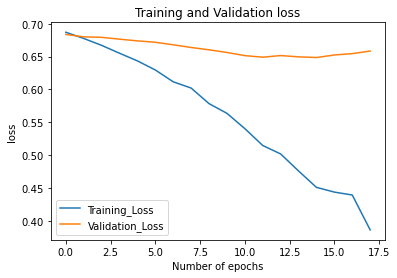

In [30]:
# Read as a dataframe 
metrics = pd.DataFrame(history.history)
# Rename column
metrics.rename(columns = {'loss': 'Training_Loss', 'accuracy': 'Training_Accuracy', 'val_loss': 'Validation_Loss', 'val_accuracy': 'Validation_Accuracy'}, inplace = True)
def plot_graphs1(var1, var2, string):
    metrics[[var1, var2]].plot()
    plt.title('Training and Validation ' + string)
    plt.xlabel ('Number of epochs')
    plt.ylabel(string)
    plt.legend([var1, var2])

plot_graphs1('Training_Loss', 'Validation_Loss', 'loss')

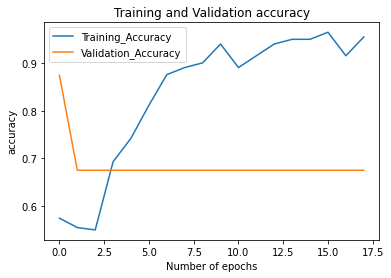

In [31]:
plot_graphs1('Training_Accuracy', 'Validation_Accuracy', 'accuracy')

In [32]:
y_pred=model.predict_classes(X_Test)

C:\Users\Admin\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


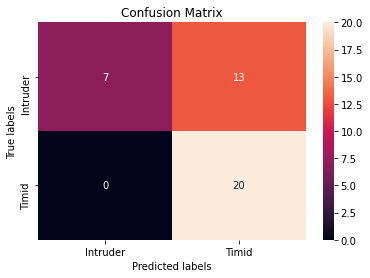

In [33]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt    

cm = confusion_matrix(y_Test, y_pred, labels=[True, False])
ax= plt.subplot()
sns.heatmap(cm, annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['Intruder', 'Timid']); 
ax.yaxis.set_ticklabels(['Intruder', 'Timid']);

In [34]:
embedding_vector_features=50
model1=Sequential()
model1.add(Embedding(vocabSize,embedding_vector_features,input_length=len(max(combined, key=len))))
model1.add(LSTM(10, dropout=0.2, return_sequences=True))
model1.add(LSTM(10, return_sequences=True))
model1.add(Dense(1, activation='sigmoid'))
model1.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics=['accuracy'])

In [35]:
model1.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 1105, 50)          1650      
_________________________________________________________________
lstm (LSTM)                  (None, 1105, 10)          2440      
_________________________________________________________________
lstm_1 (LSTM)                (None, 1105, 10)          840       
_________________________________________________________________
dense_4 (Dense)              (None, 1105, 1)           11        
Total params: 4,941
Trainable params: 4,941
Non-trainable params: 0
_________________________________________________________________


In [36]:
num_epochs = 30
early_stop = EarlyStopping(monitor='val_loss', patience=3)
history = model1.fit(X_Train, y_Train, epochs=num_epochs, validation_data=(X_Test, y_Test),callbacks =[early_stop], verbose=2)

Epoch 1/30
7/7 - 9s - loss: 0.6887 - accuracy: 0.6416 - val_loss: 0.6888 - val_accuracy: 0.5528
Epoch 2/30
7/7 - 4s - loss: 0.6821 - accuracy: 0.6443 - val_loss: 0.6853 - val_accuracy: 0.5528
Epoch 3/30
7/7 - 4s - loss: 0.6726 - accuracy: 0.6444 - val_loss: 0.6806 - val_accuracy: 0.5530
Epoch 4/30
7/7 - 4s - loss: 0.6591 - accuracy: 0.6444 - val_loss: 0.6778 - val_accuracy: 0.5530
Epoch 5/30
7/7 - 5s - loss: 0.6428 - accuracy: 0.6444 - val_loss: 0.6873 - val_accuracy: 0.5535
Epoch 6/30
7/7 - 5s - loss: 0.6350 - accuracy: 0.6447 - val_loss: 0.6865 - val_accuracy: 0.5538
Epoch 7/30
7/7 - 5s - loss: 0.6323 - accuracy: 0.6450 - val_loss: 0.6400 - val_accuracy: 0.5642
Epoch 8/30
7/7 - 5s - loss: 0.6252 - accuracy: 0.6454 - val_loss: 0.6082 - val_accuracy: 0.6194
Epoch 9/30
7/7 - 5s - loss: 0.6186 - accuracy: 0.6480 - val_loss: 0.5906 - val_accuracy: 0.7508
Epoch 10/30
7/7 - 5s - loss: 0.6097 - accuracy: 0.6521 - val_loss: 0.5711 - val_accuracy: 0.7692
Epoch 11/30
7/7 - 5s - loss: 0.5987 - a

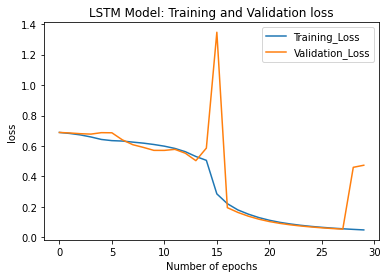

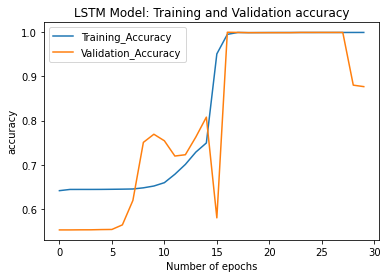

In [37]:
# Create a dataframe
metrics = pd.DataFrame(history.history)
# Rename column
metrics.rename(columns = {'loss': 'Training_Loss', 'accuracy': 'Training_Accuracy',
                         'val_loss': 'Validation_Loss', 'val_accuracy': 'Validation_Accuracy'}, inplace = True)
def plot_graphs1(var1, var2, string):
    metrics[[var1, var2]].plot()
    plt.title('LSTM Model: Training and Validation ' + string)
    plt.xlabel ('Number of epochs')
    plt.ylabel(string)
    plt.legend([var1, var2])
plot_graphs1('Training_Loss', 'Validation_Loss', 'loss')
plot_graphs1('Training_Accuracy', 'Validation_Accuracy', 'accuracy')

In [41]:
y_pred=model1.predict_classes(X_Test)
y_pred

array([[[1],
        [0],
        [0],
        ...,
        [0],
        [0],
        [0]],

       [[1],
        [0],
        [0],
        ...,
        [0],
        [0],
        [0]],

       [[1],
        [0],
        [0],
        ...,
        [0],
        [0],
        [0]],

       ...,

       [[1],
        [1],
        [1],
        ...,
        [0],
        [0],
        [0]],

       [[1],
        [1],
        [1],
        ...,
        [0],
        [0],
        [0]],

       [[1],
        [1],
        [1],
        ...,
        [0],
        [0],
        [0]]])

In [42]:
y_1=[]
for i in y_pred:
    if(sum(i)/len(i)) > 0.5:
        y_1.append(1)
    else:
        y_1.append(0)

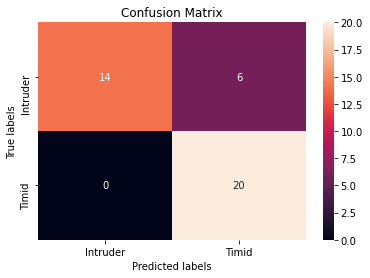

In [43]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt    

cm = confusion_matrix(y_Test, y_1, labels=[True, False])
ax= plt.subplot()
sns.heatmap(cm, annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['Intruder', 'Timid']); 
ax.yaxis.set_ticklabels(['Intruder', 'Timid']);

In [106]:
model2 = Sequential()
model2.add(Embedding(vocabSize, embedding_vector_features, input_length=len(max(combined, key=len))))
model2.add(Bidirectional(LSTM(20, dropout=0.2, return_sequences=True)))
model2.add(Dense(1, activation='sigmoid'))

In [107]:
model2.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics=['accuracy'])

In [131]:
num_epochs = 30
early_stop = EarlyStopping(monitor='val_loss', patience=3)
history = model2.fit(X_Train, y_Train, epochs=num_epochs, validation_data=(X_Test, y_Test),callbacks =[early_stop], verbose=2)

Epoch 1/30
7/7 - 9s - loss: 0.6942 - accuracy: 0.5001 - val_loss: 0.6864 - val_accuracy: 0.5533
Epoch 2/30
7/7 - 4s - loss: 0.6677 - accuracy: 0.6445 - val_loss: 0.6756 - val_accuracy: 0.5631
Epoch 3/30
7/7 - 5s - loss: 0.6486 - accuracy: 0.6444 - val_loss: 0.6701 - val_accuracy: 0.5680
Epoch 4/30
7/7 - 5s - loss: 0.6347 - accuracy: 0.6445 - val_loss: 0.6620 - val_accuracy: 0.5873
Epoch 5/30
7/7 - 5s - loss: 0.6279 - accuracy: 0.6448 - val_loss: 0.6259 - val_accuracy: 0.6038
Epoch 6/30
7/7 - 5s - loss: 0.6175 - accuracy: 0.6455 - val_loss: 0.5910 - val_accuracy: 0.6363
Epoch 7/30
7/7 - 5s - loss: 0.6058 - accuracy: 0.6490 - val_loss: 0.5650 - val_accuracy: 0.7723
Epoch 8/30
7/7 - 5s - loss: 0.5875 - accuracy: 0.6564 - val_loss: 0.5357 - val_accuracy: 0.7910
Epoch 9/30
7/7 - 5s - loss: 0.5601 - accuracy: 0.6804 - val_loss: 0.5405 - val_accuracy: 0.7514
Epoch 10/30
7/7 - 5s - loss: 0.5361 - accuracy: 0.7123 - val_loss: 0.3960 - val_accuracy: 0.8431
Epoch 11/30
7/7 - 5s - loss: 0.4095 - a

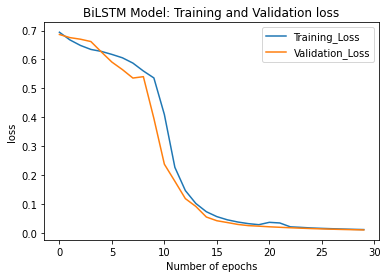

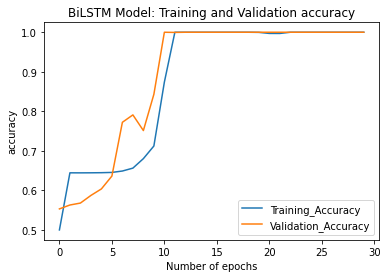

In [132]:
# Create a dataframe
metrics = pd.DataFrame(history.history)
# Rename column
metrics.rename(columns = {'loss': 'Training_Loss', 'accuracy': 'Training_Accuracy',
                         'val_loss': 'Validation_Loss', 'val_accuracy': 'Validation_Accuracy'}, inplace = True)
def plot_graphs1(var1, var2, string):
    metrics[[var1, var2]].plot()
    plt.title('BiLSTM Model: Training and Validation ' + string)
    plt.xlabel ('Number of epochs')
    plt.ylabel(string)
    plt.legend([var1, var2])
# Plot
plot_graphs1('Training_Loss', 'Validation_Loss', 'loss')
plot_graphs1('Training_Accuracy', 'Validation_Accuracy', 'accuracy')

In [137]:
y_pred=model2.predict_classes(X_Test)
y_1=[]
for i in y_pred:
    if(sum(i)/len(i)) > 0.5:
        y_1.append(1)
    else:
        y_1.append(0)

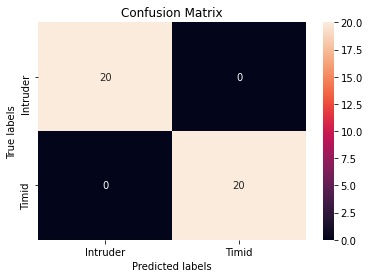

In [139]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt    

cm = confusion_matrix(y_Test, y_1, labels=[True, False])
ax= plt.subplot()
sns.heatmap(cm, annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['Intruder', 'Timid']); 
ax.yaxis.set_ticklabels(['Intruder', 'Timid']);

In [ ]:
y_pred=model.predict_classes(X_Test)

In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt    

cm = confusion_matrix(y_Test, y_pred, labels=[True, False])
ax= plt.subplot()
sns.heatmap(cm, annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['Intruder', 'Timid']); 
ax.yaxis.set_ticklabels(['Intruder', 'Timid']);

In [90]:
path="Data/Experiment 3/Detected"
f = os.listdir(path)

try:
    for index, file in enumerate(f):
        os.rename(os.path.join(path, file), os.path.join(path, ''.join([str(index), '.asm'])))
except:
    pass

In [74]:
detected =[]
for i in range(20):
    with open(path+'/'+str(i)+'.asm') as source:
        line = Optional(Word(alphas.lower(),alphanums)("opcode"))
        file=[]
        for source_line in source:
            result = line.parseString(source_line)
            if "opcode" in result:
                if result.opcode!='nop':
                    file.append(result.opcode)
        print(file)
        detected.append(file)

['mov', 'mov', 'mov', 'mov', 'int', 'mov', 'mov', 'int', 'db', 'push', 'mov', 'mov', 'mov', 'mov', 'call', 'jz', 'call', 'call', 'call', 'jz', 'call', 'call', 'call', 'pop', 'mov', 'cli', 'mov', 'cmp', 'cmp', 'cmp', 'cmp', 'cmp', 'cmp', 'cmp', 'cmp', 'cmp', 'cmp', 'cmp', 'cmp', 'cmp', 'mov', 'mov', 'mov', 'call', 'sti', 'call', 'jmp', 'mov', 'cmp', 'mov', 'cmp', 'mov', 'xor', 'mov', 'int', 'cmp', 'jz', 'xor', 'mov', 'mov', 'call', 'jnz', 'xor', 'mov', 'inc', 'mov', 'call', 'ret', 'call', 'jc', 'cmp', 'jnz', 'dec', 'mov', 'mov', 'call', 'inc', 'push', 'call', 'jz', 'pop', 'xor', 'stosb', 'mov', 'mov', 'mov', 'mov', 'mul', 'add', 'mov', 'call', 'push', 'call', 'jnz', 'call', 'jnz', 'inc', 'pop', 'xor', 'stosb', 'or', 'ret', 'call', 'ret', 'mov', 'mov', 'int', 'mov', 'mov', 'call', 'push', 'mov', 'mov', 'mov', 'int', 'or', 'jz', 'pop', 'inc', 'stosb', 'mov', 'mov', 'call', 'dec', 'push', 'call', 'jc', 'mov', 'int', 'jmp', 'pop', 'mov', 'stc', 'ret', 'pop', 'ret', 'call', 'push', 'mov', 'i

['mov', 'mov', 'mov', 'mov', 'int', 'mov', 'mov', 'int', 'db', 'push', 'mov', 'mov', 'mov', 'mov', 'call', 'jz', 'call', 'call', 'call', 'jz', 'call', 'call', 'call', 'pop', 'mov', 'cli', 'mov', 'mov', 'cmp', 'mov', 'mov', 'sti', 'call', 'jmp', 'mov', 'mov', 'mov', 'xor', 'mov', 'int', 'cmp', 'jz', 'xor', 'mov', 'mov', 'call', 'jnz', 'xor', 'mov', 'inc', 'mov', 'call', 'ret', 'call', 'jc', 'cmp', 'jnz', 'dec', 'mov', 'mov', 'call', 'inc', 'push', 'call', 'jz', 'pop', 'xor', 'stosb', 'mov', 'mov', 'mov', 'mov', 'mul', 'add', 'mov', 'call', 'push', 'call', 'jnz', 'call', 'jnz', 'inc', 'pop', 'xor', 'call', 'stosb', 'or', 'ret', 'call', 'ret', 'mov', 'mov', 'int', 'mov', 'mov', 'call', 'push', 'mov', 'cmp', 'mov', 'xor', 'xor', 'xor', 'xor', 'xor', 'xor', 'xor', 'xor', 'xor', 'xor', 'xor', 'xor', 'xor', 'mov', 'int', 'or', 'jz', 'pop', 'inc', 'stosb', 'mov', 'mov', 'call', 'dec', 'push', 'call', 'jc', 'mov', 'int', 'jmp', 'pop', 'mov', 'stc', 'ret', 'pop', 'ret', 'call', 'push', 'mov', 'i

['mov', 'mov', 'mov', 'mov', 'int', 'mov', 'mov', 'int', 'db', 'push', 'mov', 'mov', 'mov', 'mov', 'call', 'jz', 'call', 'call', 'call', 'jz', 'call', 'call', 'call', 'pop', 'mov', 'cli', 'mov', 'mov', 'cmp', 'mov', 'mov', 'call', 'sti', 'call', 'jmp', 'mov', 'mov', 'mov', 'xor', 'mov', 'int', 'cmp', 'jz', 'xor', 'mov', 'mov', 'call', 'jnz', 'xor', 'mov', 'inc', 'mov', 'call', 'ret', 'call', 'jc', 'cmp', 'jnz', 'dec', 'mov', 'mov', 'call', 'inc', 'push', 'call', 'jz', 'pop', 'xor', 'stosb', 'mov', 'mov', 'mov', 'mov', 'mul', 'add', 'mov', 'call', 'push', 'call', 'jnz', 'call', 'jnz', 'inc', 'pop', 'xor', 'call', 'stosb', 'or', 'ret', 'call', 'ret', 'mov', 'mov', 'int', 'mov', 'mov', 'call', 'push', 'mov', 'cmp', 'mov', 'xor', 'xor', 'xor', 'xor', 'xor', 'xor', 'xor', 'xor', 'xor', 'xor', 'xor', 'xor', 'xor', 'mov', 'int', 'or', 'jz', 'pop', 'inc', 'stosb', 'mov', 'mov', 'call', 'dec', 'push', 'call', 'jc', 'mov', 'int', 'jmp', 'pop', 'mov', 'stc', 'ret', 'pop', 'ret', 'call', 'push', '

In [75]:
onehotrep = [one_hot(" ".join(words), vocabSize) for words in combined+detected]
onehotrep

[[2,
  2,
  2,
  2,
  27,
  2,
  2,
  27,
  29,
  6,
  2,
  2,
  2,
  2,
  17,
  1,
  17,
  17,
  17,
  1,
  17,
  17,
  17,
  17,
  10,
  2,
  23,
  2,
  2,
  2,
  2,
  9,
  2,
  24,
  2,
  2,
  2,
  18,
  2,
  27,
  9,
  1,
  18,
  2,
  2,
  17,
  14,
  18,
  2,
  2,
  2,
  17,
  8,
  17,
  2,
  9,
  14,
  28,
  2,
  2,
  17,
  2,
  6,
  17,
  1,
  10,
  18,
  18,
  2,
  2,
  2,
  2,
  31,
  31,
  2,
  17,
  6,
  17,
  14,
  17,
  14,
  2,
  10,
  18,
  18,
  7,
  8,
  8,
  17,
  2,
  2,
  27,
  2,
  2,
  17,
  6,
  2,
  9,
  2,
  2,
  27,
  7,
  1,
  10,
  2,
  18,
  2,
  2,
  17,
  28,
  6,
  17,
  2,
  2,
  27,
  24,
  10,
  2,
  9,
  8,
  10,
  8,
  17,
  6,
  2,
  27,
  2,
  2,
  2,
  27,
  10,
  7,
  1,
  28,
  14,
  9,
  9,
  17,
  6,
  2,
  27,
  2,
  27,
  24,
  18,
  8,
  2,
  2,
  31,
  31,
  8,
  2,
  2,
  7,
  14,
  28,
  6,
  20,
  13,
  18,
  7,
  14,
  10,
  8,
  17,
  11,
  17,
  11,
  17,
  11,
  17,
  2,
  2,
  9,
  14,
  9,
  8,
  4,
  8,
  17,
  2,
  2,
  27,
  1

In [76]:
padded=pad_sequences(onehotrep,padding='post',maxlen=len(max(combined+detected, key=len)))
len(padded)

302

In [78]:
y_pred=model.predict_classes(np.array(padded[len(combined):]))

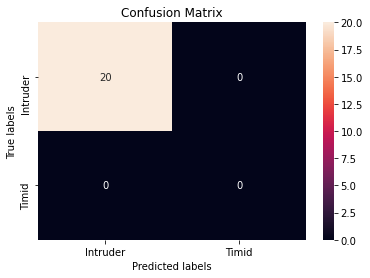

In [86]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt    

cm = confusion_matrix(np.array([1 for i in y_pred]), y_pred, labels=[True, False])
cm
ax= plt.subplot()
sns.heatmap(cm, annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['Intruder', 'Timid']); 
ax.yaxis.set_ticklabels(['Intruder', 'Timid']);